In [1]:
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import Model
from sklearn.metrics.pairwise import euclidean_distances
from keras.applications.xception import Xception
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras import applications
from keras import optimizers
import matplotlib.image as mpimg
from sklearn.neighbors import NearestNeighbors
import math
import operator

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
top_list = !ls data/train/tops

In [ ]:
top_list_test = !ls data/test/tops
top_id_test= [int(x.split('.')[0]) for x in top_list_test]
top_id_test.sort()

In [ ]:
dress_list = !ls data/train/dress

In [ ]:
top_id = [int(x.split('.')[0]) for x in top_list]
top_id.sort()

In [ ]:
dress_id = [int(x.split('.')[0]) for x in dress_list]
dress_id.sort()

In [209]:
weights_file = '/Users/Minmin/Downloads/vgg16_clothing_classifier.h5'


In [210]:
base_model = applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))


In [211]:
x = base_model.output
x = Flatten()(x)
x = Dense(4096, name='fc1')(x)
x = Dropout(0.2)(x)
x = Dense(4096, name='fc2')(x)
x = Dense(10, activation=None, name='predictions')(x)


model_final = Model(inputs=base_model.input, outputs=x)
#model_final.compile(loss="categorical_crossentropy", optimizer=optimizers.sgd(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=0.00001), metrics=["accuracy"])
model_final.load_weights(weights_file)
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [189]:
def image_pre_process(img_file):
    img = imread(img_file)
    img = resize(img, (224, 224), preserve_range=True).astype(np.float32)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [212]:
model2 = Model(input=model_final.input, output=model_final.get_layer('fc2').output)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  """Entry point for launching an IPython kernel.


In [ ]:
def process_data(id):
    out1 = []
    for i in id:
        print(i)
        name = 'data/train/tops/' + str(i) + '.jpg'
        im = image_pre_process(name)
        out = model2.predict(im)
        out1.append(out[0])
    return out1

In [213]:
## try a test data
input1=image_pre_process('data/train/tops/224748663.jpg')
input1_vector=model2.predict(input1)[0]
#dist,ind=eucl_top.kneighbors(input1_vector)
#ind=list(ind[0])

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [214]:
input1_vector

array([ 0.2856752 , -1.1943275 ,  0.25896418, ...,  0.6501186 ,
        0.68540907,  1.1632948 ], dtype=float32)

In [ ]:
def process_data_test(id):
    out1 = []
    for i in id:
        print(i)
        name = 'data/test/tops/' + str(i) + '.jpg'
        im = image_pre_process(name)
        out = model2.predict(im)
        out1.append(out[0])
    return out1

In [ ]:
list_names = !ls
if 'features_test.csv' in list_names:
    df = pd.read_csv('features_test.csv')
    num_start = df.shape[0]
else:
    num_start = 1
num_start

In [ ]:
val = 10

while num_start<=len(top_id_test):
# for i in range(shoe_num_start,shoe_num_start+val):#range(1,int(np.ceil(len(shoe_number)/val))):
    start = int(num_start)
    end = int(min(start+val,len(top_id_test)))
    print(start,end)
    try:
        out1 = process_data_test(top_id_test[start-1:end-1])
        res = pd.DataFrame(out1)
        res['product_id'] = pd.DataFrame(top_id_test[start-1:end-1])
        res.set_index('product_id', inplace=True)
    except:
        print('error image')

    if num_start==1:
        res.to_csv('features_test.csv')
    else:
        with open('features_test.csv', 'a') as f:
            res.to_csv(f, header = False)
    num_start+=val
    num_start = min(num_start,len(top_id_test))

In [ ]:
list_names = !ls
if 'features.csv' in list_names:
    df = pd.read_csv('features.csv')
    num_start = df.shape[0]
else:
    num_start = 1
num_start

In [ ]:
top_id[4999]

In [ ]:
val = 10

while num_start<=len(top_id):
# for i in range(shoe_num_start,shoe_num_start+val):#range(1,int(np.ceil(len(shoe_number)/val))):
    start = int(num_start)
    end = int(min(start+val,len(top_id)))
    print(start,end)
    try:
        out1 = process_data(top_id[start-1:end-1])
    except:
        print('error image')
    res = pd.DataFrame(out1)
    res['product_id'] = pd.DataFrame(top_id[start-1:end-1])
    res.set_index('product_id', inplace=True)

    if num_start==1:
        res.to_csv('features.csv')
    else:
        with open('features.csv', 'a') as f:
            res.to_csv(f, header = False)
    num_start+=val
    num_start = min(num_start,len(top_id))

In [6]:
df=pd.read_csv('features_top.csv')
df.shape

(5345, 4097)

In [14]:
df.set_index('product_id',inplace=True)

In [ ]:
#df.index.name = 'top_id'

In [ ]:
eucl_top= NearestNeighbors(n_neighbors=4,metric='euclidean').fit(df)

In [ ]:
cos_top=NearestNeighbors(n_neighbors=4,metric='cosine').fit(df)

In [ ]:
distances, indices_top = eucl_top.kneighbors(df)

In [ ]:
distances_cos, indices_cos=cos_top.kneighbors(df)

In [ ]:
Data_cos = pd.DataFrame(np.array(df.index[indices_cos]))

In [ ]:
Data_top = pd.DataFrame(np.array(df.index[indices_top]))

In [ ]:
def plot_tops(indices):
    plt.figure(figsize=[10,10])

    plt.subplot(2,2,1)
    #im=mpimg.imread('data/test/tops/467117452.jpg')
    im = mpimg.imread('data/train/tops/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][0])+'.jpg')
    plt.imshow(im)
    plt.title('Original - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][0]))
    #plt.title('Original - '+ find_price_test(467117452))
    plt.axis('off')

    plt.subplot(2,2,2)
    im = mpimg.imread('data/train/tops/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][1])+'.jpg')
    #im = mpimg.imread('data/train/tops/'+str(df.index[indices[0]])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 1 - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][1]))
    #plt.title('Recommendation 1 - '+ find_price(df.index[indices[0]]))
    plt.axis('off')

    plt.subplot(2,2,3)
    im = mpimg.imread('data/train/tops/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][2])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 2 - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][2]))
    plt.axis('off')

    plt.subplot(2,2,4)
    im = mpimg.imread('data/train/tops/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][3])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 3 - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][3]))
    plt.axis('off');

In [ ]:
plot_tops(782)

In [32]:
meta=pd.read_pickle('metadata/train_meta/tops.pickle')
meta=pd.DataFrame(meta)

In [33]:
meta['final_price']=0
meta.loc[meta['saleprice'] != None,'final_price']=meta['saleprice']
meta['final_price']=meta['final_price'].fillna(0)
meta.loc[meta['final_price'] == 0,'final_price']=meta['price']
meta.head()

,categories,id,image_url,parent_category,price,product_name,saleprice,final_price
0,[tees-and-tshirts],472140360,https://img.shopstyle-cdn.com/pim/4f/ad/4fadef...,tops,$19.50,Madewell Whisper Cotton V-Neck Pocket Tee,None,$19.50
1,[tees-and-tshirts],649091558,https://img.shopstyle-cdn.com/pim/c5/9f/c59f91...,tops,$17,BP. Raw Edge V-Neck Tee,None,$17
2,[tees-and-tshirts],668894662,https://img.shopstyle-cdn.com/pim/d7/1e/d71e87...,tops,$44,Sanctuary Uptown Tiered Hem Linen Tee,$26.40,$26.40
3,"[plus-size-tops, tees-and-tshirts]",666446889,https://img.shopstyle-cdn.com/pim/58/42/5842cb...,tops,$19.50,Madewell Whisper Cotton V-Neck Pocket Tee,None,$19.50
4,[womens-tops],660051520,https://img.shopstyle-cdn.com/pim/90/73/907359...,tops,$68,Free People Palisades Off the Shoulder Top,$45.56,$45.56


In [34]:
def find_price(img_id):
    price=meta.loc[meta['id']==img_id,'final_price'].values[0]
    return price

In [29]:
meta_test=pd.read_pickle('metadata/test_meta/tops_test.pickle')
meta_test=pd.DataFrame(meta_test)
meta_test

,categories,id,image_url,parent_category,price,product_name,saleprice
0,"[plus-size-tops, womens-tops]",692156409,https://img.shopstyle-cdn.com/pim/73/dc/73dc2d...,tops,$69,City Chic Plus Off-the-Shoulder Bell Sleeve Top,None
1,[tees-and-tshirts],693359518,https://img.shopstyle-cdn.com/pim/26/a4/26a436...,tops,$156,Comme des Garcons PLAY Stripe Cotton Tee,None
2,"[petite-tops, longsleeve-tops, tees-and-tshirts]",673521436,https://img.shopstyle-cdn.com/pim/ae/14/ae1480...,tops,$128,Eileen Fisher Silk Tee,$89.60
3,"[sweaters, womens-tops]",651716636,https://img.shopstyle-cdn.com/pim/4a/9e/4a9e04...,tops,$130,Barefoot Dreams(R) Barefoot Dreams Cozychic Ul...,None
4,[button-front-tops],734154784,https://img.shopstyle-cdn.com/pim/04/93/049353...,tops,$148,Rails Hunter Plaid Shirt,$88.80
5,"[sweaters, womens-tops]",656248343,https://img.shopstyle-cdn.com/pim/10/25/102502...,tops,$78,Thread & Supply Wubby Fleece Pullover,None
6,[tees-and-tshirts],435423474,https://img.shopstyle-cdn.com/pim/d9/4c/d94c4d...,tops,$125,Burberry Check Trim Tee,None
7,"[longsleeve-tops, tunic-tops]",544695895,https://img.shopstyle-cdn.com/pim/eb/59/eb599a...,tops,$118,Free People Just the Two of Us Floral Tunic,$70.80
8,[womens-tops],730899254,https://img.shopstyle-cdn.com/pim/aa/e9/aae91c...,tops,$69,R & M Richards Sequined Lace Poncho Top,$57.99
9,"[longsleeve-tops, tunic-tops]",738922171,https://img.shopstyle-cdn.com/pim/1b/bf/1bbf7d...,tops,$78,Joan Vass Floral Roll-Sleeve Tunic,$55


In [30]:
meta_test['final_price']=0
meta_test.loc[meta_test['saleprice'] != None,'final_price']=meta_test['saleprice']
meta_test['final_price']=meta_test['final_price'].fillna(0)
meta_test.loc[meta_test['final_price'] == 0,'final_price']=meta_test['price']
meta_test.head()

,categories,id,image_url,parent_category,price,product_name,saleprice,final_price
0,"[plus-size-tops, womens-tops]",692156409,https://img.shopstyle-cdn.com/pim/73/dc/73dc2d...,tops,$69,City Chic Plus Off-the-Shoulder Bell Sleeve Top,None,$69
1,[tees-and-tshirts],693359518,https://img.shopstyle-cdn.com/pim/26/a4/26a436...,tops,$156,Comme des Garcons PLAY Stripe Cotton Tee,None,$156
2,"[petite-tops, longsleeve-tops, tees-and-tshirts]",673521436,https://img.shopstyle-cdn.com/pim/ae/14/ae1480...,tops,$128,Eileen Fisher Silk Tee,$89.60,$89.60
3,"[sweaters, womens-tops]",651716636,https://img.shopstyle-cdn.com/pim/4a/9e/4a9e04...,tops,$130,Barefoot Dreams(R) Barefoot Dreams Cozychic Ul...,None,$130
4,[button-front-tops],734154784,https://img.shopstyle-cdn.com/pim/04/93/049353...,tops,$148,Rails Hunter Plaid Shirt,$88.80,$88.80


In [28]:
def find_price_test(img_id):
    price=meta_test.loc[meta_test['id']==img_id,'price'].values[0]
    return price

In [ ]:
import math
import operator
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    index=[]
    for x in range(k):
        neighbors.append(distances[x][0])
        index=index.append(distances[x])
    return neighbors, index
 
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 

In [13]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [16]:
euclideanDistance(input1_vector, np.array(df)[0], 4096)

71.60031284497697

In [158]:

eucl_distances=euclidean_distances(input1_vector, np.array(df))[0]
cos_distances=cosine_distances(input1_vector, np.array(df))[0]

In [177]:
dist = cosine_distances(input1_vector, np.array(df))[0]
com=dict(zip(df.index,dist))
ids=sorted(com, key=com.get)
result=ids[:6]
result

[721629654, 742854915, 462409018, 736367802, 735690947, 725565509]

In [167]:
dist = euclidean_distances(input1_vector, np.array(df))[0]

In [ ]:
com=dict(zip(df.index,dist))
sorted(com.items(), key=lambda x:x[1])

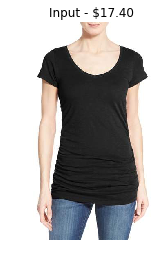

In [175]:
im = mpimg.imread('data/train/tops/224748663.jpg')
plt.imshow(im)
plt.axis('off')
plt.title('Input - '+ find_price(224748663));

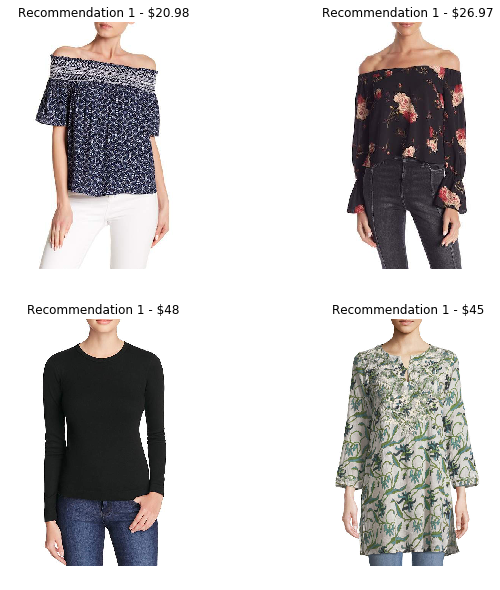

In [178]:
plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
im = mpimg.imread('data/train/tops/'+str(result[0])+'.jpg')
plt.imshow(im)
plt.title('Recommendation 1 - '+ find_price(result[0]))
plt.axis('off');

plt.subplot(2,2,2)
im = mpimg.imread('data/train/tops/'+str(result[1])+'.jpg')
plt.imshow(im)
plt.title('Recommendation 1 - '+ find_price(result[1]))
plt.axis('off');

plt.subplot(2,2,3)
im = mpimg.imread('data/train/tops/'+str(result[2])+'.jpg')
plt.imshow(im)
plt.title('Recommendation 1 - '+ find_price(result[2]))
plt.axis('off');

plt.subplot(2,2,4)
im = mpimg.imread('data/train/tops/'+str(result[3])+'.jpg')
plt.imshow(im)
plt.title('Recommendation 1 - '+ find_price(result[3]))
plt.axis('off');